# Homework 5 - Enis Becirbegovic

***Hash Tables***  

In this exercise, we will begin to explore the concept of hashing and how it related to various object
containers with respect to computational complexity. We will begin with the base code for as described
in Chapter 5 of Grokking Algorithms (Bhargava 2016).

In [2]:
import string
import copy
import numpy as np
import pandas as pd
import timeit
import inspect
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
sns.set()

In [3]:
def quicksort(array):
    if len(array) < 2:
        # base case, arrays with 0 or 1 element are already "sorted"
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all the elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all the elements greater than the pivot
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 13, 7, 8, 1, 15, 12, 8]))

[1, 2, 5, 7, 8, 8, 10, 12, 13, 15]


# 1.

Create the following three datasets.

* Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine,
* just make sure there are no duplicates in the name) and store those names in an unsorted list.
* Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html (https://docs.python.org/3.7/library/stdtypes.html) ).
* Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

At this point you should have three collections:

1. an unsorted list of names,
2.  a set of those same names, and
3.  a sorted list of the same names.

Something like this:

names_unsrt = ['B', 'X', 'T'],

names_set = {'B', 'X', 'T'}, and

names_srt = ['B', 'T', 'X']

In [4]:
letters = string.ascii_lowercase
r_string =  ''.join(random.choice(letters) for i in range(50)) 
 
 
def list_of_random_string(size ):
    l = []
    i = 1
    while len(l) < size:
        random.seed(i)
        r_string = ''.join(random.choice(letters ) for i in range(10))
        if r_string not in l:    
            l.append(r_string)
        i +=1 
    return l

 

In [5]:
#create a list 
l_100000 =  list_of_random_string(100000)

In [6]:
# create a set
set_100000  = set(l_100000)

In [91]:
#create sorted list (2 version)

# Python Implementation

start = time.perf_counter()
l_100000_srt= quicksort(copy.deepcopy(l_100000))
end = time.perf_counter()
sort_time_py = end-start
print("Sort time Python Implementation: " ,sort_time_py)

Sort time Python Implementation:  0.5438098909999098


In [90]:
# Numpy Implementation
list_array = np.array(copy.deepcopy(l_100000))
start = time.perf_counter()
l_100000_srt= np.sort(list_array, kind='quicksort')
end = time.perf_counter()
l_100000_srt = list(l_100000_srt)
sort_time_np = end-start
print("Sort time NumPy Implementation: " , sort_time_np)

Sort time NumPy Implementation:  0.025373991000378737


In [12]:
if len(set_100000)==len(l_100000):
    print("There are no duplicates in the original list")
else:
    print("Duplicates exist")

There are no duplicates in the original list


### Discussion:

We create three data structures and check for duplicates. For the sorted list I used the quicksort algorithm primarily because it showed to be an efficient sort algorithm from the last week assignment beating merge sort and insertion sort. I have sorted using both Python implementation and NumPy implementation. The difference is quite significant (Python implementation is about 20x slower).

# 2. 

Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th,
and 100,000th positions, and store them in a temporary array somewhere for later use.

In [9]:
select_el_position = [10000,30000,50000,70000,90000,100000]
selected = []
for e in select_el_position:
    elem_temp = l_100000[e-1]
    selected.append(elem_temp)
    

# check selected eleements
print(selected)

['syjbwdwauy', 'gazpdhadko', 'obfnsjrtjh', 'qlavnwwntu', 'iqhapkbrjp', 'cpzawmxxrl']


### Discussion

In this section we retrive names (of random string) given the position from the **unsorted list**. This will be used as search element for **all** searching algorithms.

# 3.

Now search for these six names in each of the collections. Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set. Capture the time it takes using all three algorithms.

## Linear Search

In [13]:
def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
      
    return None

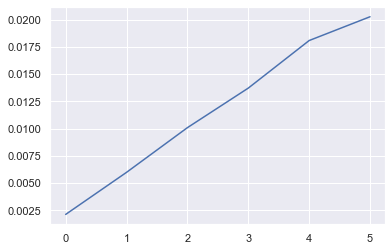

In [14]:
import time
stored_times_linear  = []
l_copy = copy.deepcopy(l_100000)
for search_element in selected:   
    start = time.perf_counter()
    linear_search(l_copy,search_element) 
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_linear.append(total_time2)    
#     print(len(l), total_time2)
pd.Series(stored_times_linear).plot()

## Binary Search

In [15]:

class BinarySearch():
    
  def search_iterative(self, list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

  def search_recursive(self, list, low, high, item):
    # Check base case 
    if high >= low: 
  
        mid = (high + low) // 2
        guess = list[mid]
  
        # If element is present at the middle itself 
        if guess == item:
            return mid 
  
        # If element is smaller than mid, then it can only 
        # be present in left subarray 
        elif guess > item: 
            return self.search_recursive(list, low, mid - 1, item) 
  
        # Else the element can only be present in right subarray 
        else: 
            return self.search_recursive(list, mid + 1, high, item) 
  
    else: 
        # Element is not present in the array 
        return None
bs = BinarySearch()

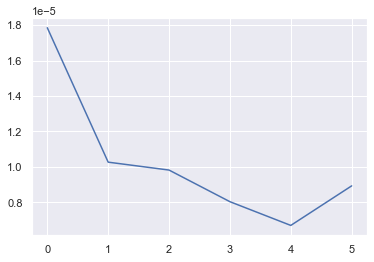

In [84]:
import time
stored_times_binary  = []
l_copy = copy.deepcopy(l_100000_srt)
for search_element in selected:   
    start = time.perf_counter()
    bs.search_iterative(l_copy, search_element)
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_binary.append(total_time2)    
#     print(len(l), total_time2)
pd.Series(stored_times_binary).plot()

## Set

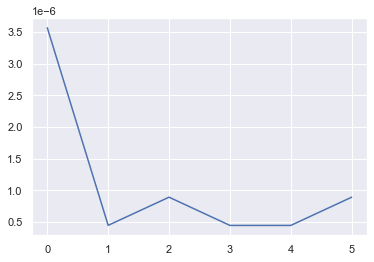

In [47]:
import time
stored_times_set  = []
set_copy = copy.deepcopy(set_100000)
for search_element in selected :   
    start = time.perf_counter()
    set_copy.remove(search_element)
#     search_element in set_copy
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_set.append(total_time2)    
pd.Series(stored_times_set).plot()

In this section, we use implement linear search, binary search, and hash table search (using set as hash table implementation). 

***NOTE*** all elements to be searched are gather from the unsorted list position. We should not expect these elements to be in the same position for the sorted list.

# 4.

Create a table and plot comparing times of linear search, binary search and set lookup for the six
names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate
algorithm performance.

In [85]:
results = pd.DataFrame([select_el_position,
                        stored_times_linear,
                        stored_times_binary,                         
                        stored_times_set]).T

results.columns = ['position','linear','binary', 'set'  ]
results['binary+sort'] = results['binary'] + sort_time_np
results

,position,linear,binary,set,binary+sort
0,10000.0,0.002129,0.000018,3.569000e-06,0.024528
1,30000.0,0.005987,0.000010,4.470000e-07,0.024520
2,50000.0,0.010085,0.000010,8.920001e-07,0.024520
3,70000.0,0.013712,0.000008,4.459998e-07,0.024518
4,90000.0,0.018072,0.000007,4.460001e-07,0.024517
5,100000.0,0.020254,0.000009,8.919999e-07,0.024519


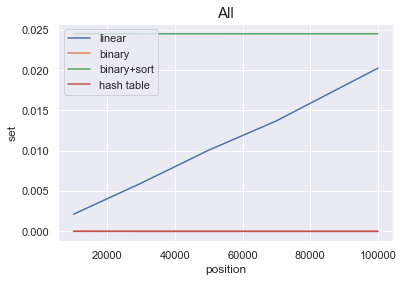

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax2 = plt.twinx()
sns.lineplot(data=results, x="position", y="linear",label='linear') 
sns.lineplot(data=results, x="position", y="binary",label='binary')
sns.lineplot(data=results, x="position", y="binary+sort",label='binary+sort')
sns.lineplot(data=results, x="position", y="set",label='hash table' )


ax1.grid(True)
ax1.legend(loc='upper left' )
plt.title('All',fontsize= 15);

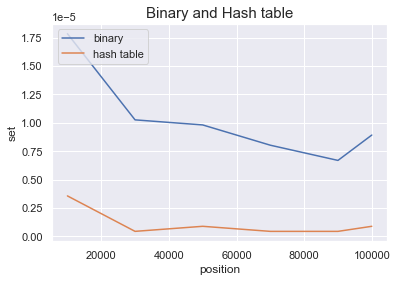

In [89]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.lineplot(data=results, x="position", y="binary",label='binary')
sns.lineplot(data=results, x="position", y="set",label='hash table' )


ax1.grid(True)
ax1.legend(loc='upper left' )
plt.title('Binary and Hash table',fontsize= 15);

### Discussion:

In this section we are plotting all algorithms against each other, as well as binary serach and hash table in isolation. The discussion and impact can be found in the executive summary. 

# Executive Summary 


In this exercise, we are comparing access times to the unsorted list using **linear search**, search within python set object (which has python hash table implementation) by using **set.remove()** method, and **binary search** with and without sort. 

The methodology consist of the following steps:

1. Set up 3 collections (unsorted list, ordered list, set) 
2. Get elements to search based on their position in the unsorted list
3. Run Linear Search on the unsorted list, Binary Search on Sorted List, set.remove() (which need to find the element to remove) on a copy of the set collection  
4. Compare and plot the run times 
 
From our work to this point we know that linear search has big O of O(n), binary search O(log n), and hash table O(1). We also know that the sorting algorithm needs to be accounted for when doing a binary search. In the following analysis search time for binary search with and without the sort is plotted as well. For this exercise, I used quicksort implementation by using Numpy sort method. This method is 20x faster than Python implementation. From our previous assignment, the quicksort algorithm has shown to be very efficient compared to other sorting algorithms (e.g. merge, insert), which is the reason why I selected a quick sort for this assignment.


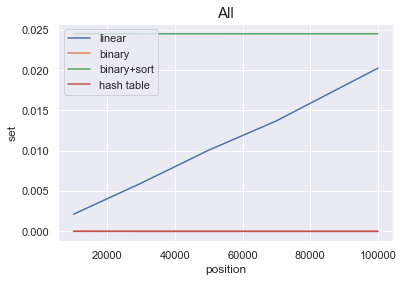

The first plot shows the comparison of all the algorithms. From this graph, we can see the linear search is the slowest of all of them (excluding binary with sort) with time linearly increase in time consistent with O(n). While we can't really see the shape of the line we can reasonably conclude that hash table access is really fast and it has a constant time of access regardless of the position which is consistent with O(1) access time. Given the scale binary search is alone can basically not be distinguished from the binary hash table search. We can also observe that sort time rally increases the total time for binary search + sort.


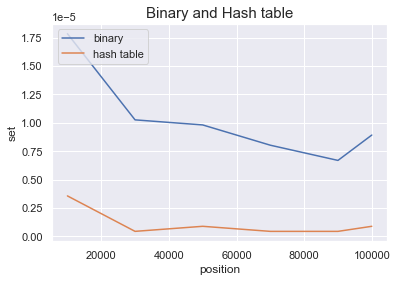

The second plot compares Binary Search and Hash Table (using Python set implementation). To note that binary search does not exhibit big O of O(log n) in this plot becuase our search elements are based on the position in the unsorted list. They are not necessarily monotonically increasing. However, the plot reveals important features. 1) We can reasonably conclude that set.remove() is efficient and almost constant as expected from big O of O(1), 2) We can also conclude that the hash table is more efficient than binary search as expected by the big.
